In [1]:
import pandas

In [2]:
df=pandas.read_csv("scmp2015.csv")

In [3]:
dfc=df["datetime"]=="2015-11-16"
df0701=df[dfc]
df0701

,Unnamed: 0,title,byline,dates,datetime
14641,15113,Post-Occupy scars: record number of complaints...,"Yau, Cannix.",16 Nov 2015,2015-11-16
14642,15104,Attacks in Paris again show that the world mus...,NaN,16 Nov 2015,2015-11-16
14643,15105,"Around the nation, November 16, 2015",NaN,16 Nov 2015,2015-11-16
14644,15106,Taiwan's election 2016: how politicians could ...,"Sun, Celine.",16 Nov 2015,2015-11-16
14645,15107,Sights set low for talks between presidents of...,"Chen, Andrea.",16 Nov 2015,2015-11-16
14646,15111,China tipped to relax fiscal rules to spur eco...,"Wu, Wendy.",16 Nov 2015,2015-11-16
14647,15109,Hearings in Citic market misconduct case start...,"Robertson, Benjamin.",16 Nov 2015,2015-11-16
14648,15110,Where's the toilet? Hong Kong's 'Iron Lady' Ca...,"Cheung, Tony.",16 Nov 2015,2015-11-16
14649,15112,The transformation of mild-mannered Hong Kong ...,"Cheung, Tony.",16 Nov 2015,2015-11-16
14650,15103,Track record will be key in Hong Kong's distri...,NaN,16 Nov 2015,2015-11-16


In [4]:
titlelist=df0701["title"].tolist()
titlelist

['Post-Occupy scars: record number of complaints against Hong Kong doctors fuelled by medics who refused to treat police during street protests: Rise in complaints linked to political grievances, many against medics who refused to treat police',
 'Attacks in Paris again show that the world must unite to defeat terrorism',
 'Around the nation, November 16, 2015',
 "Taiwan's election 2016: how politicians could blow it all with a handkerchief",
 'Sights set low for talks between presidents of China and the Philippines: Concessions on territorial claims unlikely, but Beijing and Manila may agree to look into crisis management system and boost economic ties',
 'China tipped to relax fiscal rules to spur economy',
 'Hearings in Citic market misconduct case start today: Case involves charges relating to undisclosed massive foreign exchange hedging losses',
 "Where's the toilet? Hong Kong's 'Iron Lady' Carrie Lam tells children of her fears from her first flight: Chief secretary tells childre

In [5]:
f = open('20150708scmp.txt','w')
for i in range(len(titlelist)):
    f.write(titlelist[i])
f.close()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import imageio
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 

def getText(txt):
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

def remove_stopwords(words):
    processed_word_list = []
    for word in words:
        word = word.lower() # in case they arenet all lower cased
        if word not in stopwords:
            processed_word_list.append(word)
    return processed_word_list

In [7]:
def word_count(processed_word_list):
    word_count = pandas.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:20]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('SCMP Top20')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('/Users/xuyucan/SCMP词频统计.png',dpi=400)  
    plt.show() 

In [16]:
def tag_cloud(text):
    image = Image.open(r'./sansetu.png')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,stopwords=stopwords,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(text))
    img = imageio.imread(r"\users\xuwen\venv\test\ppp.jpg") 
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    #wc.to_file(r"/Users/xuyucan/SCMP_tagcloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('SCMP2015G21106', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

In [19]:
stopwords = stopwordslist('./stopwords.txt')
stopwords
newstopwords = ['will','with',"in","hk","china","kong","''china's","world","tells","china's","amid","Chinese","china's","hongkong","says","say","hong","kong","kong's"]
stopwords.extend(newstopwords)
stopwords

['!!',
 '?!',
 '??',
 '!?',
 '`',
 '``',
 "''",
 '-lrb-',
 '-rrb-',
 '-lsb-',
 '-rsb-',
 ',',
 '.',
 ':',
 ';',
 '"',
 "'",
 '?',
 '<',
 '>',
 '{',
 '}',
 '[',
 ']',
 '+',
 '-',
 '(',
 ')',
 '&',
 '%',
 '$',
 '@',
 '!',
 '^',
 '#',
 '*',
 '..',
 '...',
 "'ll",
 "'s",
 "'m",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 

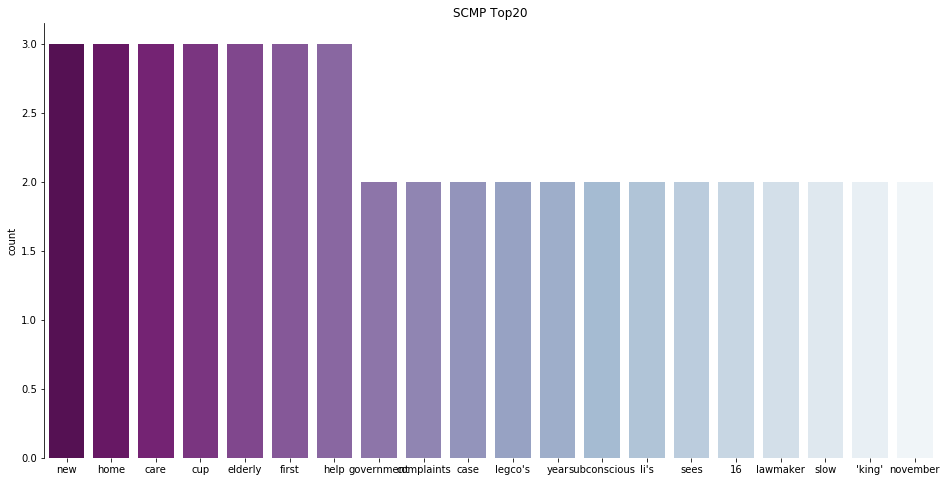

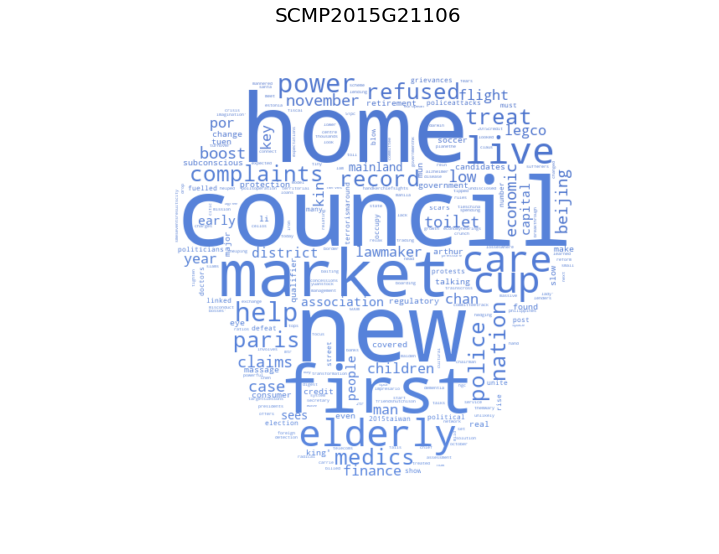

In [20]:
test=getText('./20150708scmp.txt')  
words=test.split()
processed_word_list = remove_stopwords(words)
word_count(processed_word_list)
tag_cloud(processed_word_list)